In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Iedata
Iedata = pd.read_csv("Downloads/income_evaluation.csv")

 # Descriptive analysis

In [3]:
# Preview Iedata
Iedata.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Shape of Iedata
print('Rows: {} Columns: {}'.format(Iedata.shape[0], Iedata.shape[1]))

Rows: 32561 Columns: 15


In [5]:
# Features data-type
Iedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# Statistical summary
Iedata.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [7]:
# Check for null values
round((Iedata.isnull().sum() / Iedata.shape[0]) * 100, 2).astype(str) + ' %'

age                0.0 %
 workclass         0.0 %
 fnlwgt            0.0 %
 education         0.0 %
 education-num     0.0 %
 marital-status    0.0 %
 occupation        0.0 %
 relationship      0.0 %
 race              0.0 %
 sex               0.0 %
 capital-gain      0.0 %
 capital-loss      0.0 %
 hours-per-week    0.0 %
 native-country    0.0 %
 income            0.0 %
dtype: object

In [8]:
# Check for '?' in Iedata
round((Iedata.isin([' ?']).sum() / Iedata.shape[0])
      * 100, 2).astype(str) + ' %'

age                 0.0 %
 workclass         5.64 %
 fnlwgt             0.0 %
 education          0.0 %
 education-num      0.0 %
 marital-status     0.0 %
 occupation        5.66 %
 relationship       0.0 %
 race               0.0 %
 sex                0.0 %
 capital-gain       0.0 %
 capital-loss       0.0 %
 hours-per-week     0.0 %
 native-country    1.79 %
 income             0.0 %
dtype: object

In [9]:
# Checking the counts of label categories
income = Iedata[' income'].value_counts(normalize=True)
round(income * 100, 2).astype('str') + ' %'

 <=50K    75.92 %
 >50K     24.08 %
Name:  income, dtype: object

# Exploratory Data Analysis
## Univariate Analysis

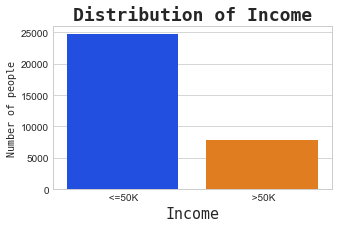

In [10]:
# Creating a barplot for 'Income'
income = Iedata[' income'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(5, 3))
sns.barplot(income.index, income.values, palette='bright')
plt.title('Distribution of Income', fontdict={
          'fontname': 'Monospace', 'fontsize': 18, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 10})
plt.tick_params(labelsize=10)
plt.show()

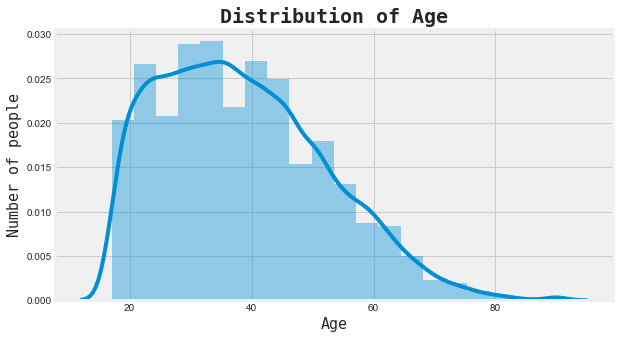

In [11]:
# Creating a distribution plot for 'Age'
age = Iedata['age'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(Iedata['age'], bins=20)
plt.title('Distribution of Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()


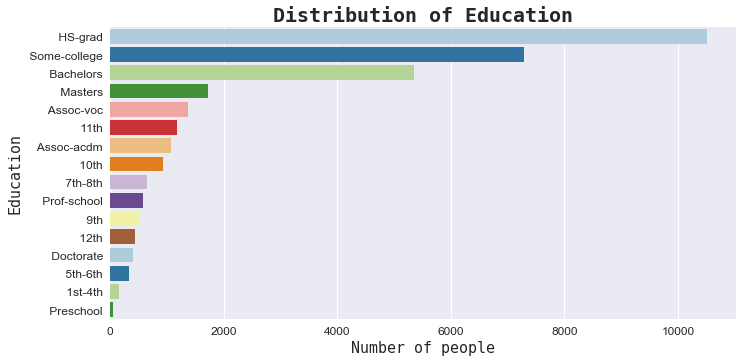

In [12]:
# Creating a barplot for 'Education'
edu = Iedata[' education'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(edu.values, edu.index, palette='Paired')
plt.title('Distribution of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

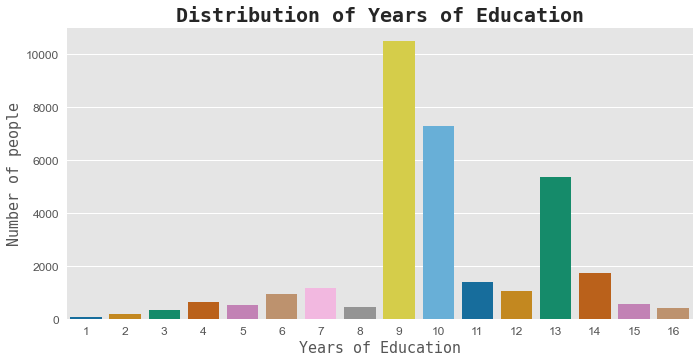

In [13]:
# Creating a barplot for 'Years of Education'
edu_num = Iedata[' education-num'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(edu_num.index, edu_num.values, palette='colorblind')
plt.title('Distribution of Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

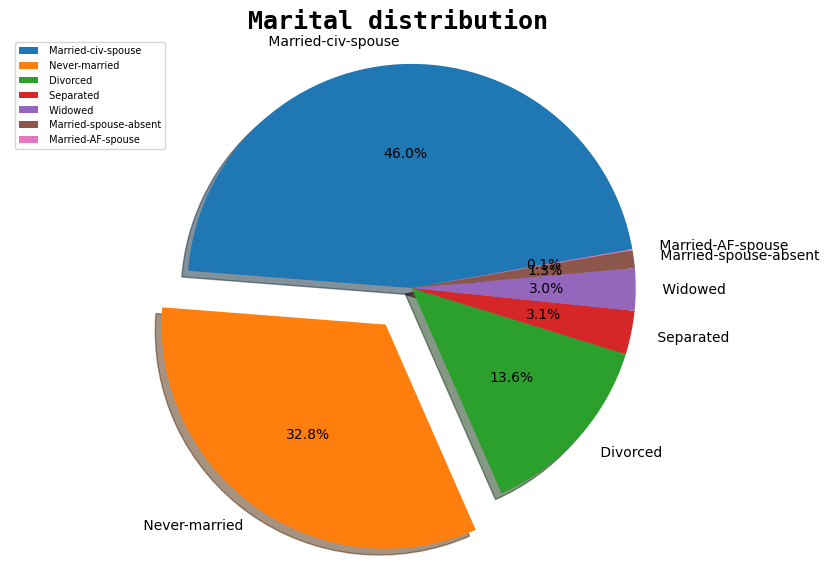

In [14]:
# Creating a pie chart for 'Marital status'
marital = Iedata[' marital-status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 18, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

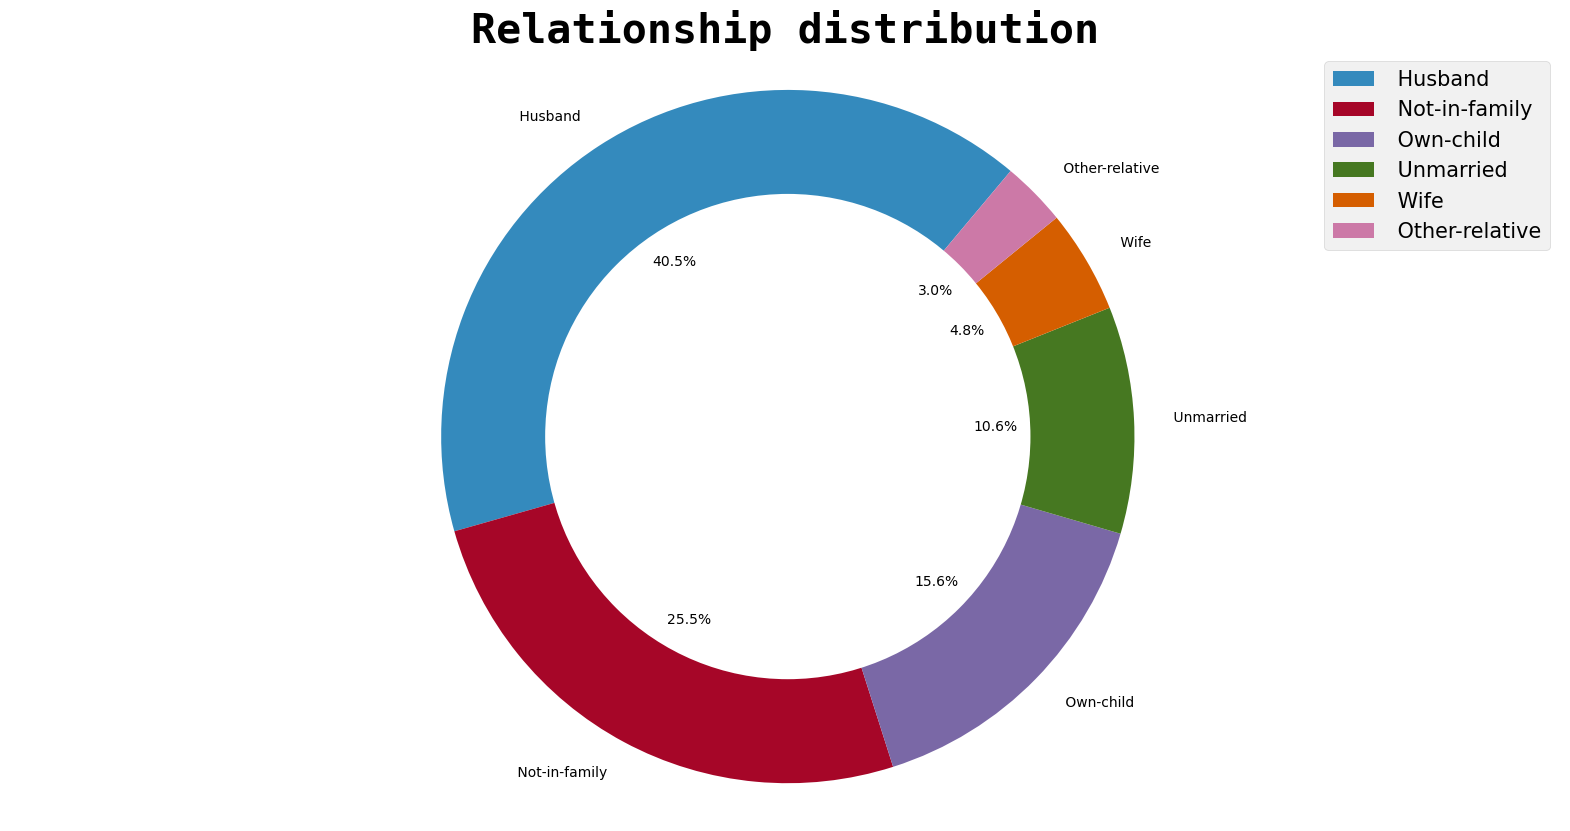

In [15]:
# Creating a donut chart for 'Age'
relation = Iedata[' relationship'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

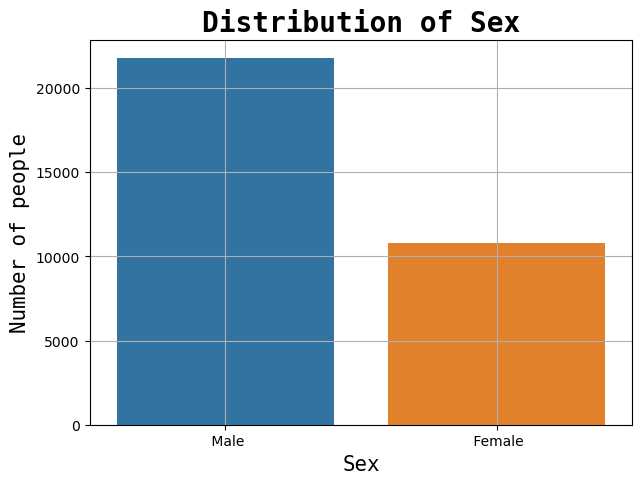

In [16]:
# Creating a barplot for 'Sex'
sex = Iedata[' sex'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
sns.barplot(sex.index, sex.values)
plt.title('Distribution of Sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.grid()
plt.show()


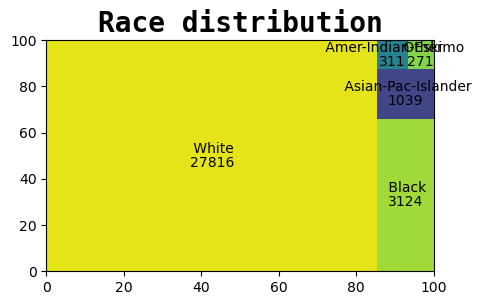

In [17]:
# Creating a Treemap for 'Race'
import squarify
race = Iedata[' race'].value_counts()

plt.style.use('default')
plt.figure(figsize=(5, 3))
squarify.plot(sizes=race.values, label=race.index, value=race.values)
plt.title('Race distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.show()

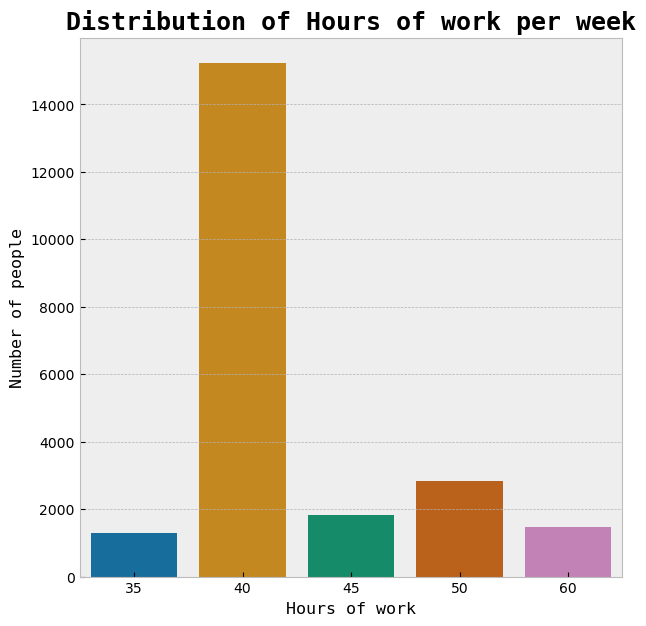

In [18]:
# Creating a barplot for 'Hours per week'
hours = Iedata[' hours-per-week'].value_counts().head(5)

plt.style.use('bmh')
plt.figure(figsize=(7, 7))
sns.barplot(hours.index, hours.values, palette='colorblind')
plt.title('Distribution of Hours of work per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 18, 'fontweight': 'bold'})
plt.xlabel('Hours of work', fontdict={'fontname': 'Monospace', 'fontsize': 12})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 12})
plt.tick_params(labelsize=10)
plt.show()

# Bivariate Analysis

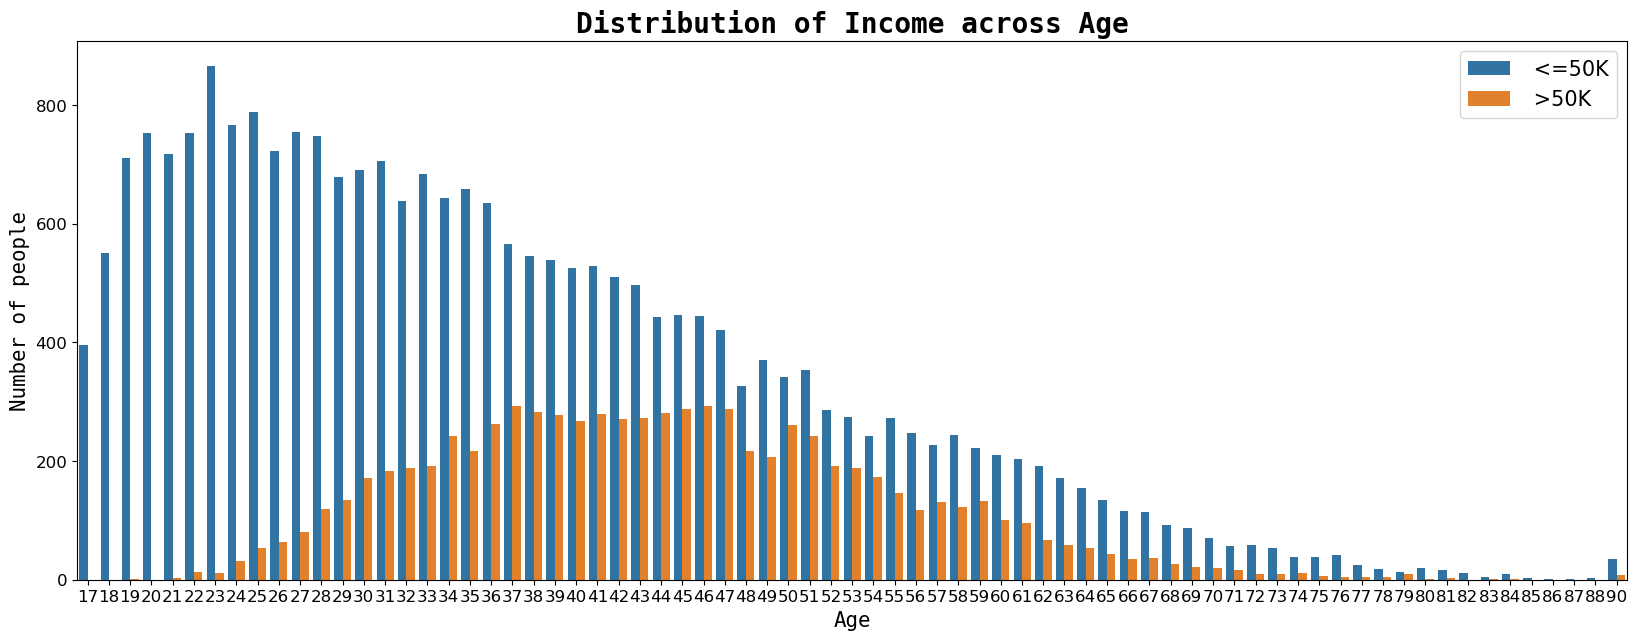

In [19]:
# Creating a countplot of income across age
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(Iedata['age'], hue=Iedata[' income'])
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

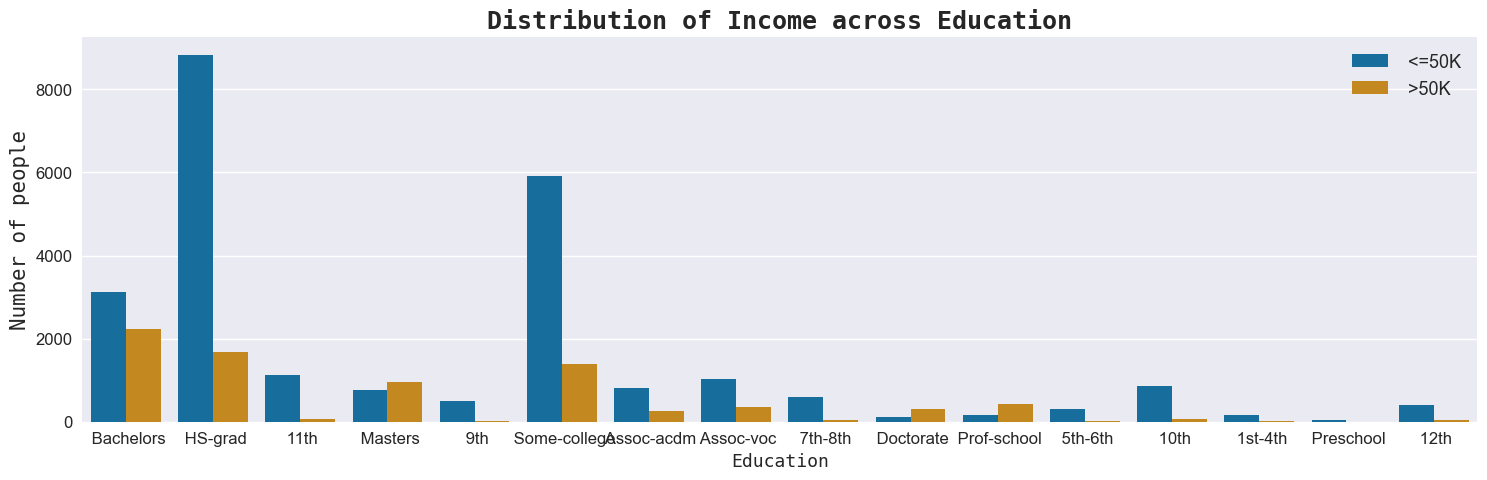

In [20]:
# Creating a countplot of income across education
plt.style.use('seaborn')
plt.figure(figsize=(18, 5
                   ))
sns.countplot(Iedata[' education'],
              hue=Iedata[' income'], palette='colorblind')
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 18, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 13})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 13})
plt.show()

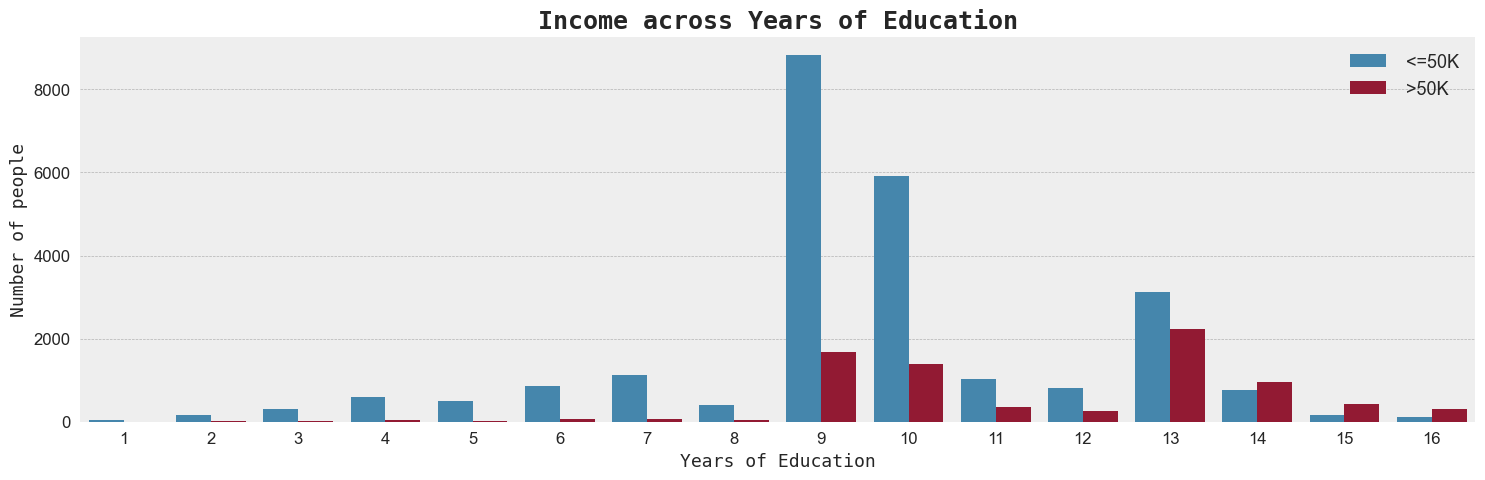

In [21]:
# Creating a countplot of income across years of education
plt.style.use('bmh')
plt.figure(figsize=(18, 5))
sns.countplot(Iedata[' education-num'],
              hue=Iedata[' income'])
plt.title('Income across Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 18, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 13})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 13})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 13})
plt.savefig('edunun.png')
plt.show()

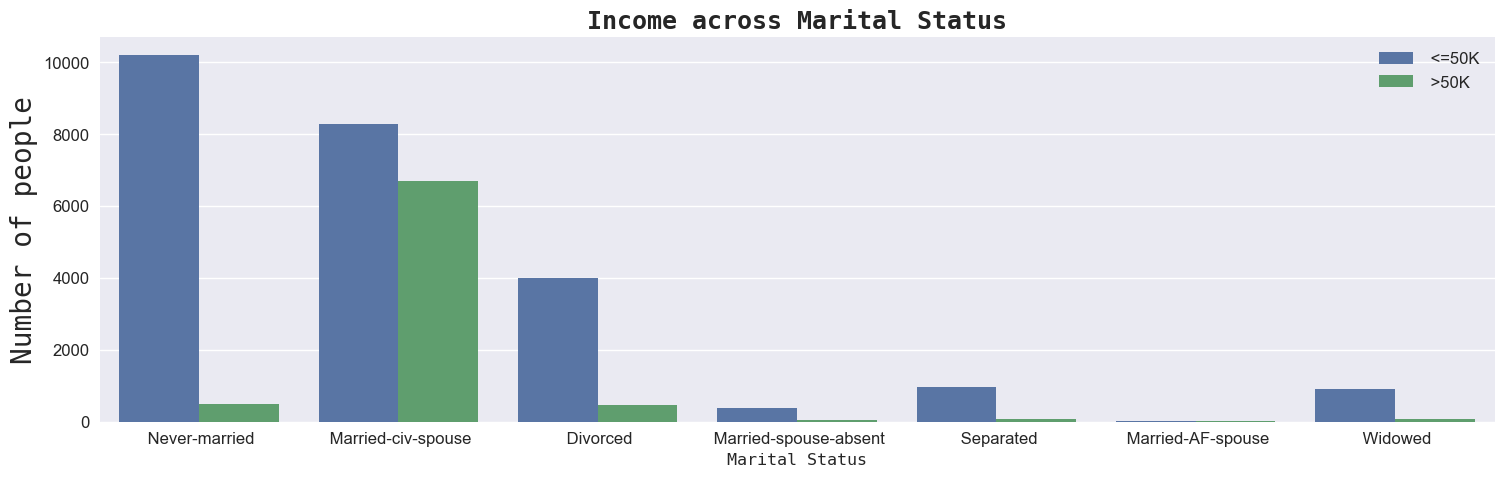

In [22]:
# Creating a countplot of income across Marital Status
plt.style.use('seaborn')
plt.figure(figsize=(18, 5))
sns.countplot(Iedata[' marital-status'], hue=Iedata[' income'])
plt.title('Income across Marital Status', fontdict={
          'fontname': 'Monospace', 'fontsize': 18, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={
           'fontname': 'Monospace', 'fontsize': 12})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 20})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 12})
plt.savefig('marital.png')
plt.show()


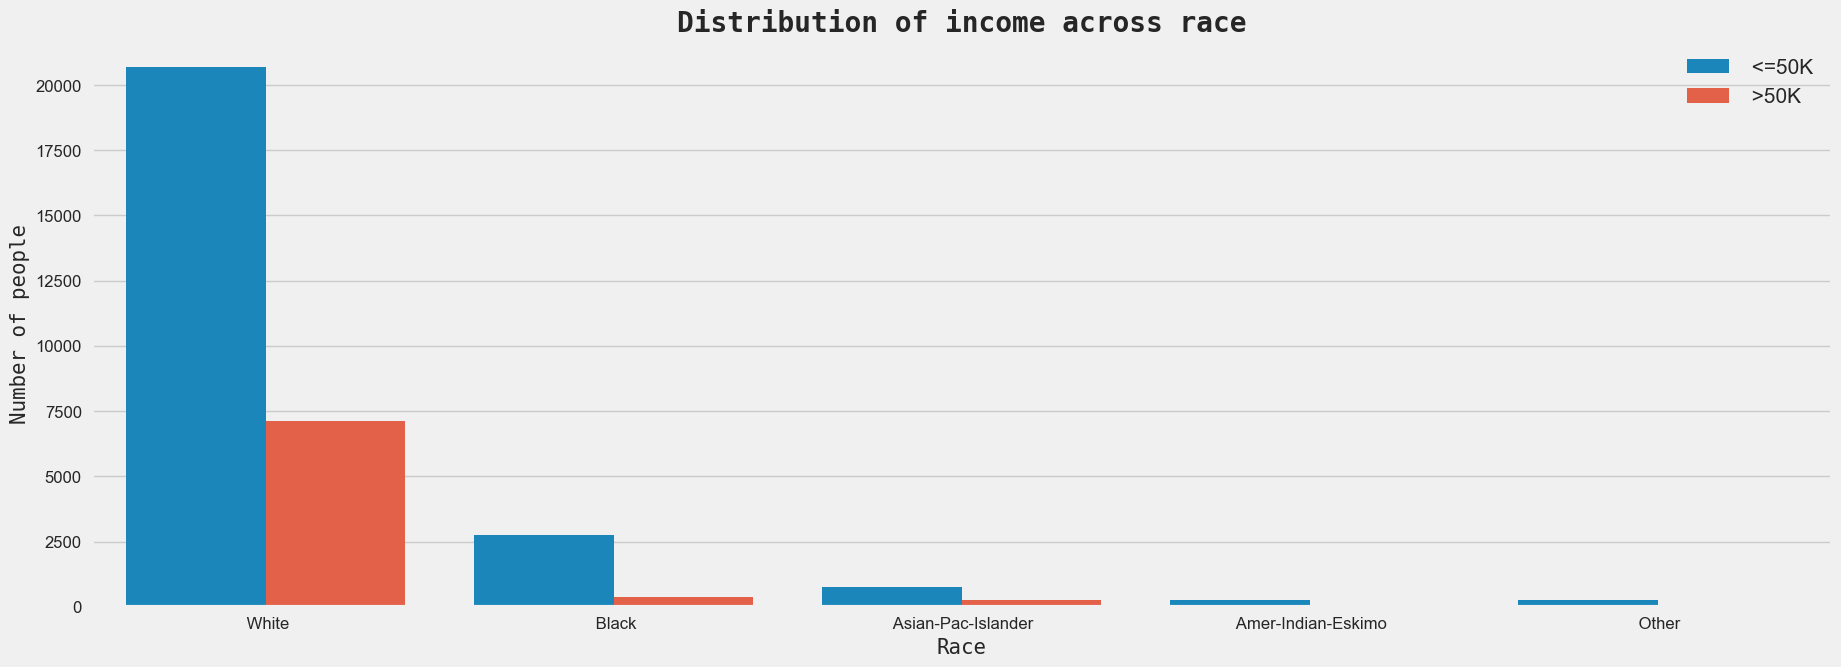

In [23]:
# Creating a countplot of income across race
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 7))
sns.countplot(Iedata[' race'], hue=Iedata[' income'])
plt.title('Distribution of income across race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

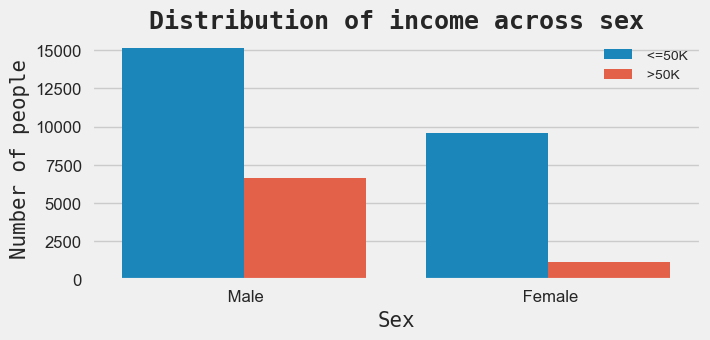

In [24]:
# Creating a countplot of income across sex
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7, 3))
sns.countplot(Iedata[' sex'], hue=Iedata[' income'])
plt.title('Distribution of income across sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 18, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})
plt.savefig('bi3.png')
plt.show()

# Multivariate Analysis

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
Iedata[' income'] = le.fit_transform(Iedata[' income'])

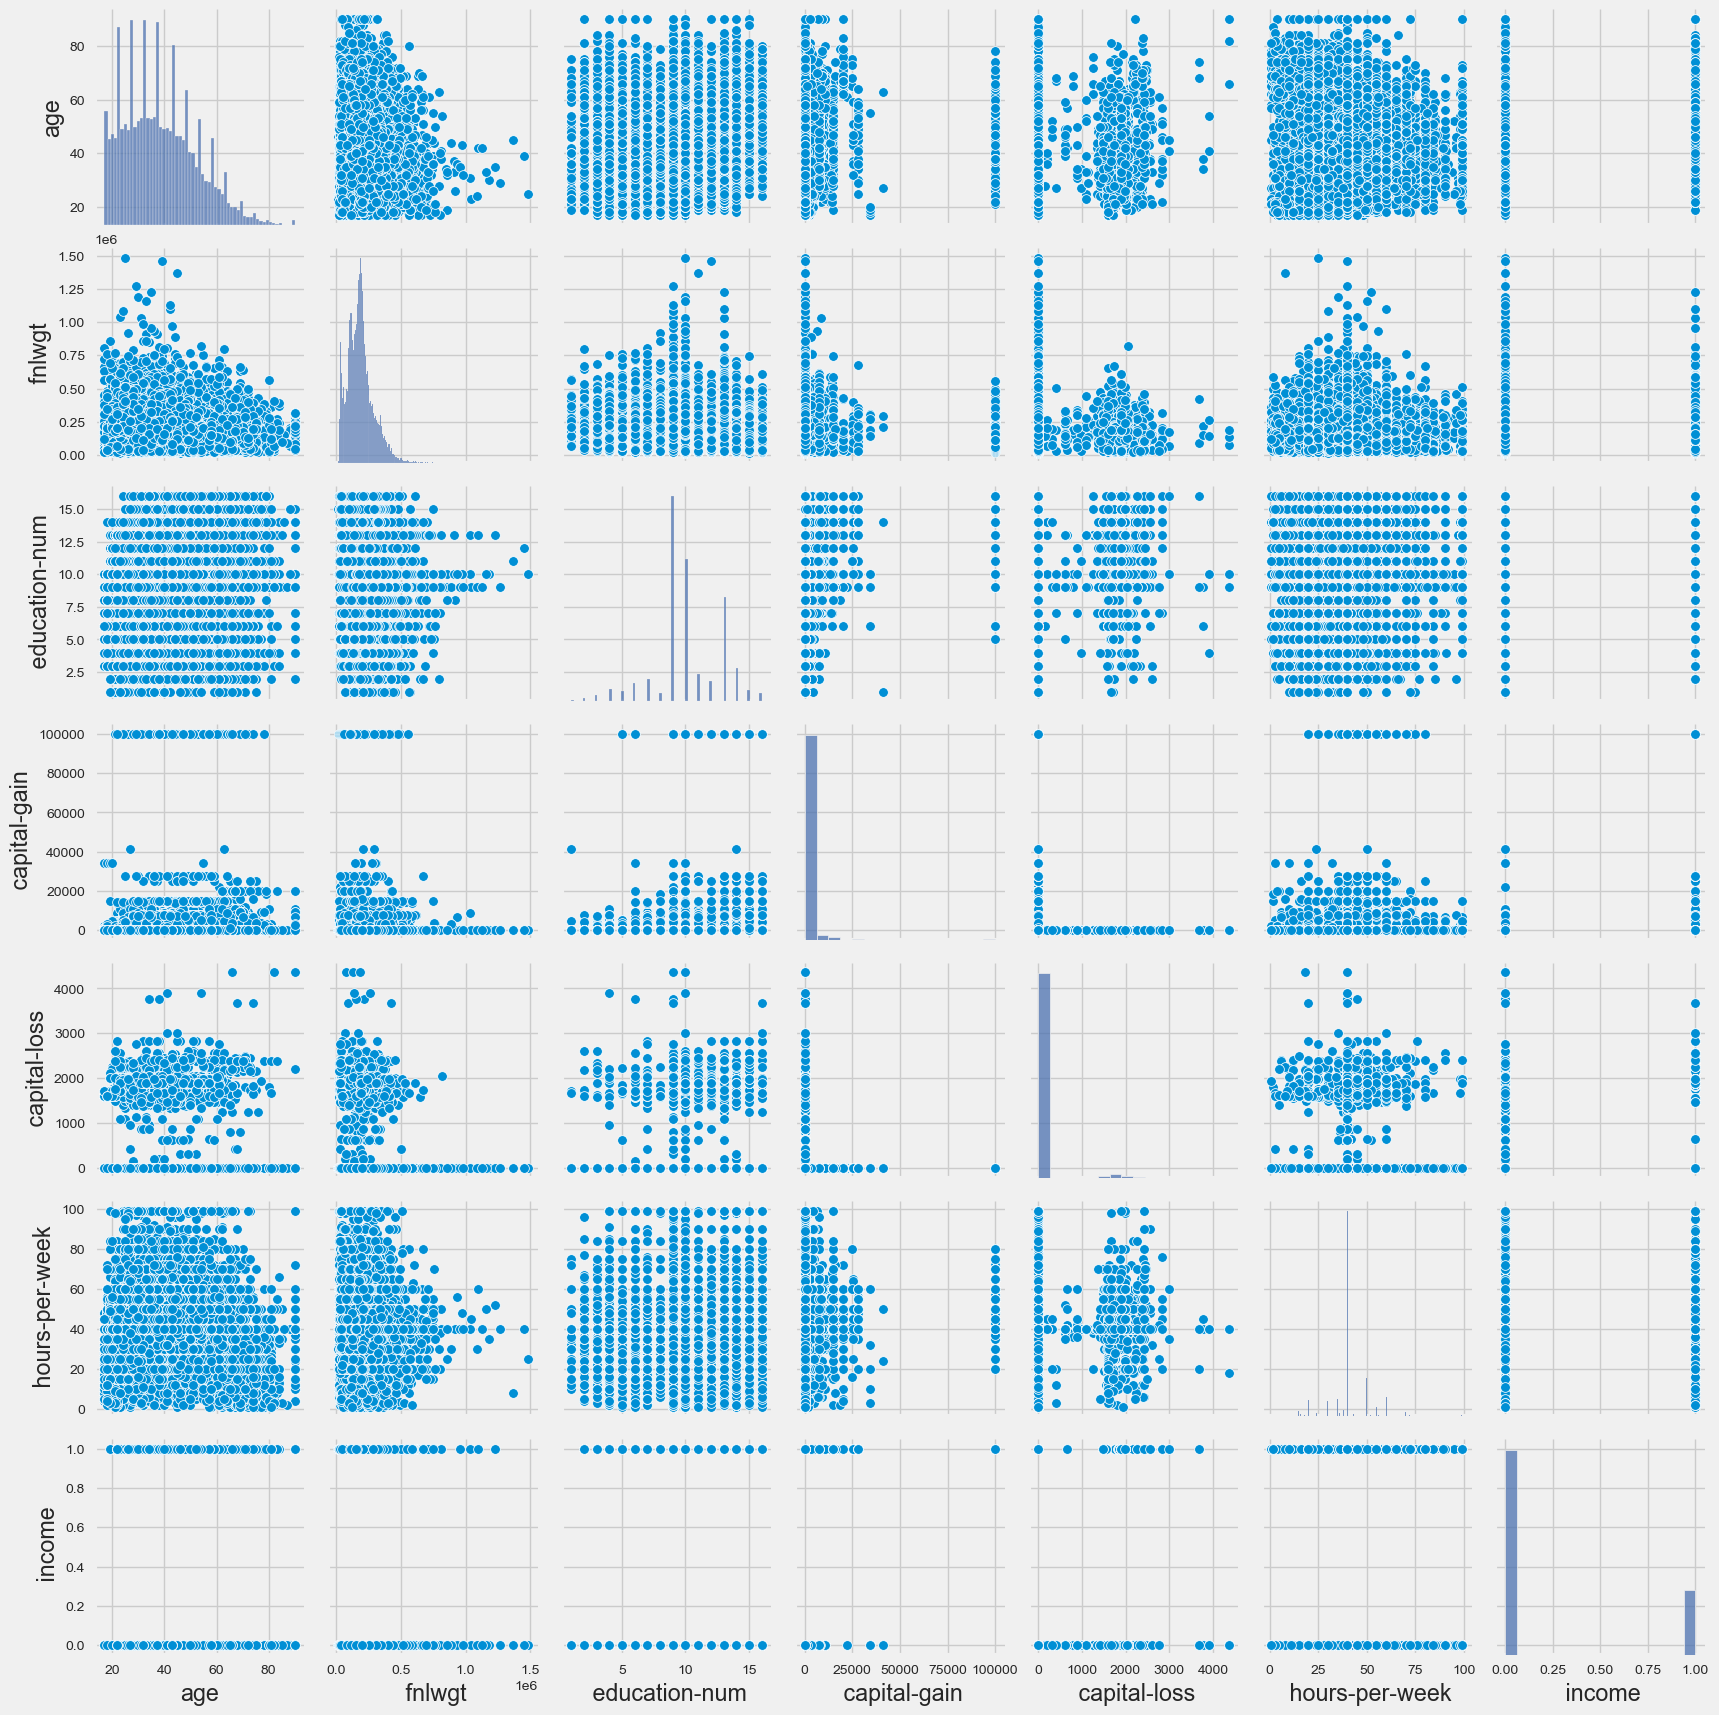

In [27]:
# Creating a pairplot of Iedata
sns.pairplot(Iedata)
plt.savefig('multi1.png')
plt.show()

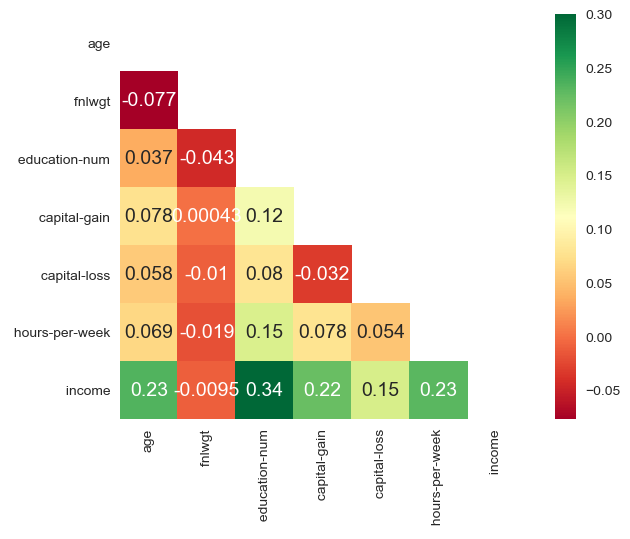

In [28]:
corr = Iedata.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                     annot=True, cmap='RdYlGn')
plt.savefig('correlation.png')
plt.show()

#  Data Preprocessing
## Fixing '?' values in the Iedata

In [29]:
Iedata = Iedata.replace(' ?', np.nan)

In [30]:
# Checking null values
round((Iedata.isnull().sum() / Iedata.shape[ 0]) * 100, 2).astype(str) + ' %'

age                 0.0 %
 workclass         5.64 %
 fnlwgt             0.0 %
 education          0.0 %
 education-num      0.0 %
 marital-status     0.0 %
 occupation        5.66 %
 relationship       0.0 %
 race               0.0 %
 sex                0.0 %
 capital-gain       0.0 %
 capital-loss       0.0 %
 hours-per-week     0.0 %
 native-country    1.79 %
 income             0.0 %
dtype: object

In [31]:
columns_with_nan = [' workclass', ' occupation', ' native-country']

In [32]:
for col in columns_with_nan:
    Iedata[col].fillna(Iedata[col].mode()[0], inplace=True)

In [33]:
#Label Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
for col in Iedata.columns:
    if Iedata[col].dtypes == 'object':
        encoder = LabelEncoder()
        Iedata[col] = encoder.fit_transform(Iedata[col])

# Feature Selection

In [36]:
X = Iedata.drop(' income', axis=1)
Y = Iedata[' income']


In [37]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)

In [38]:
selector.fit(X, Y)

ExtraTreesClassifier(random_state=42)

In [39]:
feature_imp = selector.feature_importances_

In [40]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 15.59
1 4.13
2 16.71
3 3.87
4 8.66
5 8.04
6 7.27
7 8.62
8 1.47
9 2.84
10 8.83
11 2.81
12 9.64
13 1.53


In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              32561 non-null  int64
 1    workclass       32561 non-null  int32
 2    fnlwgt          32561 non-null  int64
 3    education       32561 non-null  int32
 4    education-num   32561 non-null  int64
 5    marital-status  32561 non-null  int32
 6    occupation      32561 non-null  int32
 7    relationship    32561 non-null  int32
 8    race            32561 non-null  int32
 9    sex             32561 non-null  int32
 10   capital-gain    32561 non-null  int64
 11   capital-loss    32561 non-null  int64
 12   hours-per-week  32561 non-null  int64
 13   native-country  32561 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 2.5 MB


In [42]:
X = X.drop([' workclass', ' education', ' race', ' sex',
            ' capital-loss', ' native-country'], axis=1)

# Feature Scaling

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

In [45]:
# Fixing imbalanced Iedata using Oversampling

In [46]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.92 %
1    24.08 %
Name:  income, dtype: object

In [47]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [48]:
ros.fit(X, Y)

RandomOverSampler(random_state=42)

In [49]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [50]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

1    50.0 %
0    50.0 %
Name:  income, dtype: object

In [51]:
#Creating a train test split

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [53]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (39552, 8)
X_test shape: (9888, 8)
Y_train shape: (39552,)
Y_test shape: (9888,)


# data modelling

In [54]:
#Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [56]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, Y_train)
Y_pred_log_reg = log_reg.predict(X_test)

In [57]:
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_log_reg) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_log_reg) * 100, 2))

Logistic Regression:
Accuracy score: 76.02
F1 score: 76.25


In [58]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [59]:
Y_pred_knn = knn.predict(X_test)

In [60]:
print('KNN Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_knn) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_knn) * 100, 2))

KNN Classifier:
Accuracy score: 83.44
F1 score: 84.58


In [61]:
svc = SVC(random_state=42)
svc.fit(X_train, Y_train)

SVC(random_state=42)

In [62]:
Y_pred_svc = svc.predict(X_test)

In [63]:
print('Support Vector Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_svc) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_svc) * 100, 2))

Support Vector Classifier:
Accuracy score: 81.71
F1 score: 82.9


In [64]:
nb = GaussianNB()

In [65]:
nb.fit(X_train, Y_train)

GaussianNB()

In [66]:
Y_pred_nb = nb.predict(X_test)

In [67]:
print('Naive Bayes Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_nb) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_nb) * 100, 2))

Naive Bayes Classifier:
Accuracy score: 65.46
F1 score: 50.09


In [68]:
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [69]:
Y_pred_dec_tree = dec_tree.predict(X_test)

In [70]:
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_dec_tree) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_dec_tree) * 100, 2))

Decision Tree Classifier:
Accuracy score: 90.99
F1 score: 91.49


In [71]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [72]:
Y_pred_ran_for = random_forest.predict(X_test)

In [73]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_ran_for) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.44
F1 score: 92.8


# Hyperparameter Tuning

In [74]:
from sklearn.model_selection import RandomizedSearchCV

In [75]:
n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

In [76]:
param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

In [77]:
random_tuned = RandomForestClassifier(random_state=42)
random_cv = RandomizedSearchCV(
    estimator=random_tuned, param_distributions=param_dist, cv=5, random_state=42)
random_cv.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=42)

In [78]:
random_cv.best_score_

0.912014447709274

In [79]:
random_cv.best_params_

{'n_estimators': 134, 'max_depth': 142}

In [80]:
random_best = RandomForestClassifier(
    max_depth=102, n_estimators=40, random_state=42)

In [81]:
random_best.fit(X_train, Y_train)

RandomForestClassifier(max_depth=102, n_estimators=40, random_state=42)

In [82]:
Y_pred_random_best = random_best.predict(X_test)

In [83]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_random_best) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_random_best) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.47
F1 score: 92.82


In [84]:
from sklearn.metrics import confusion_matrix
confu = confusion_matrix(Y_test, Y_pred_random_best)

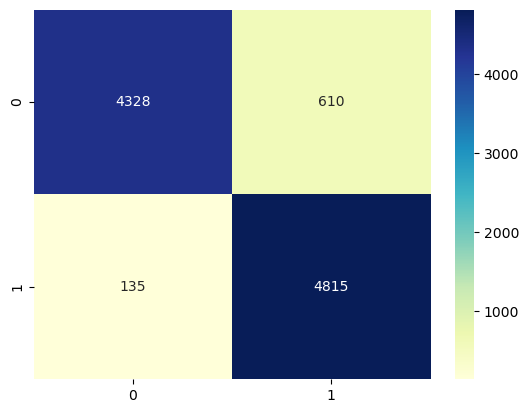

In [85]:
plt.style.use('default')
sns.heatmap(confu, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

In [86]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_random_best))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      4938
           1       0.89      0.97      0.93      4950

    accuracy                           0.92      9888
   macro avg       0.93      0.92      0.92      9888
weighted avg       0.93      0.92      0.92      9888

